<a href="https://colab.research.google.com/github/rahulevol/Projects/blob/main/InternshipDay2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [16]:
df = pd.read_csv('/content/Titanic-Dataset.csv')
df.columns = df.columns.str.strip()


In [17]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450

In [18]:
print("\nDataset Info:")
print(df.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [19]:
print("\nMissing Values Count:")
print(df.isnull().sum())


Missing Values Count:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [20]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop(columns=['Cabin'], inplace=True)

In [21]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [22]:
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [23]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]

In [13]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]

In [24]:
df = remove_outliers(df, 'Age')
df = remove_outliers(df, 'Fare')

In [25]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   718.000000  718.000000  718.000000  718.000000  718.000000   
mean    447.883008    0.334262    2.512535   -0.095144    0.413649   
std     259.549777    0.472061    0.715818    0.772200    0.855001   
min       1.000000    0.000000    1.000000   -2.054613    0.000000   
25%     220.250000    0.000000    2.000000   -0.592481    0.000000   
50%     447.500000    0.000000    3.000000    0.000000    0.000000   
75%     673.500000    1.000000    3.000000    0.244398    1.000000   
max     891.000000    1.000000    3.000000    1.870059    5.000000   

            Parch        Fare  
count  718.000000  718.000000  
mean     0.317549   -0.302242  
std      0.784792    0.266674  
min      0.000000   -0.648422  
25%      0.000000   -0.489568  
50%      0.000000   -0.411839  
75%      0.000000   -0.126366  
max      6.000000    0.587429  


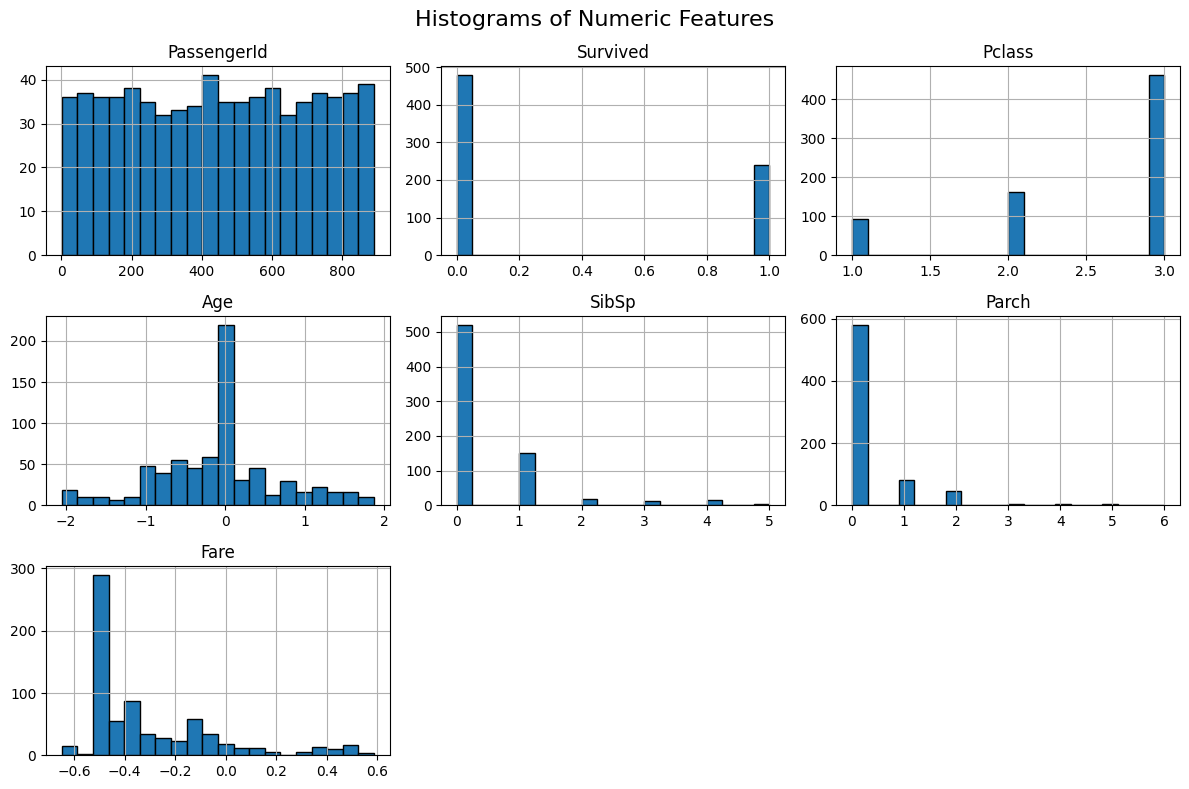

In [26]:
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

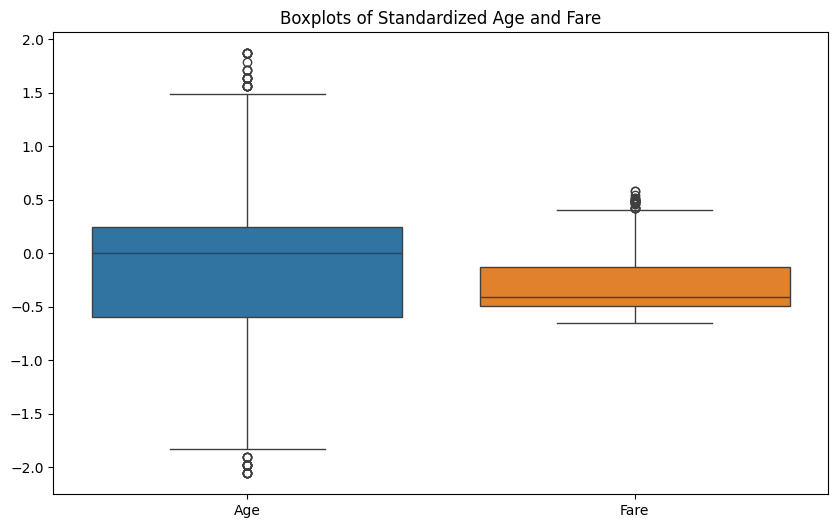

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title("Boxplots of Standardized Age and Fare")
plt.show()

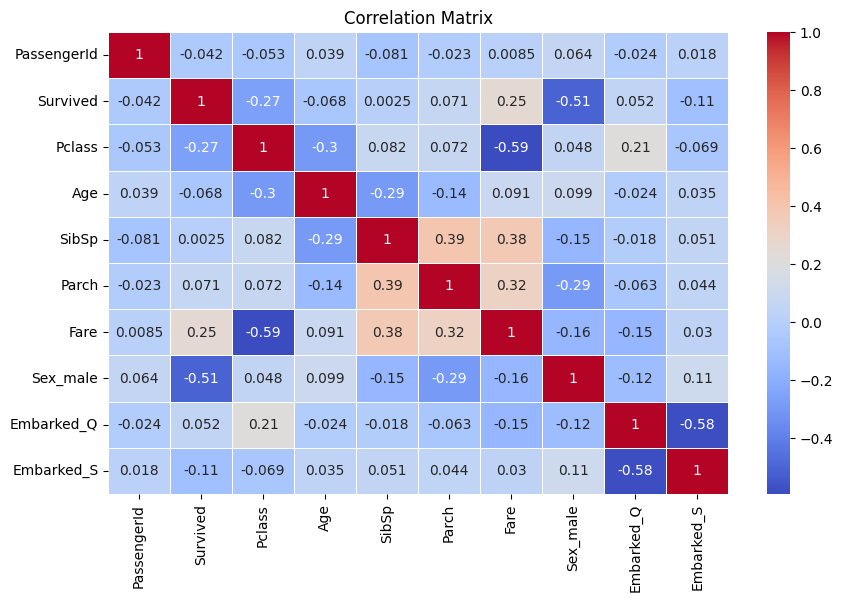

In [28]:
plt.figure(figsize=(10, 6))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

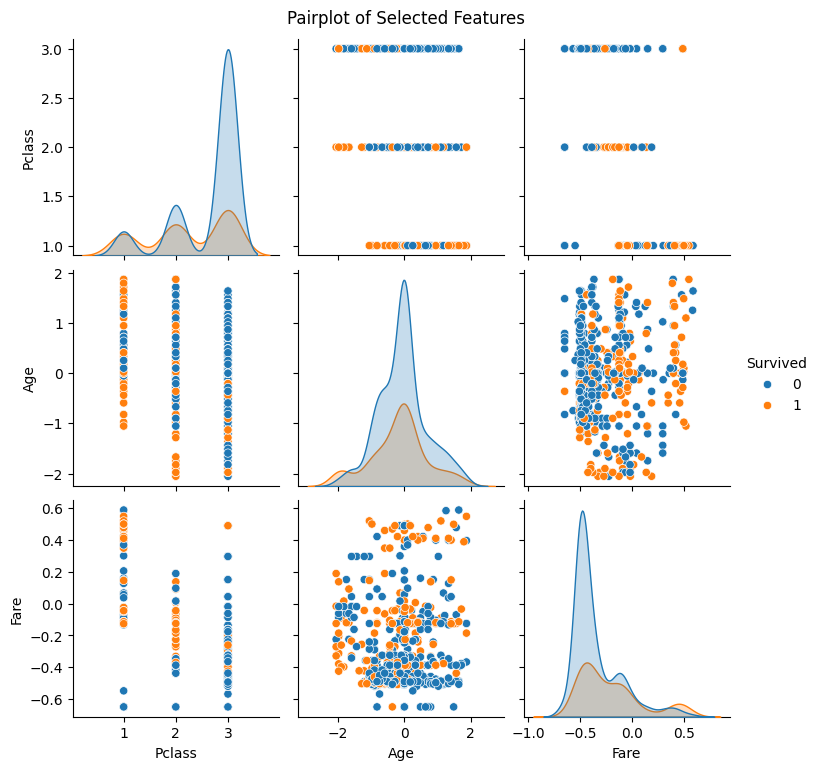

In [29]:
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()